In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
import cv2
from easyocr import Reader

# Create output list for individual adverts

In [2]:
# Initialisiere EasyOCR mit der gewünschten Sprache (in dem Fall Englisch)
reader = Reader(['en'], gpu=True)

In [ ]:
# Definiere den Pfad zu deinem Zielordner
target_folder = "/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2013/ADs_IG_2013/AD0271"


In [107]:
# Definiere den Pfad zu deinem Zielordner
target_folder = "/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2016/ADs_IG_2016/AD0417"


### Methode 2: Wasserzeichen abdecken mit schwarzen Box

Ein Beispiel Frame mit schwarzen Box abdecken

Erstes Frame geladen: /home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2016/ADs_IG_2016/AD0417/AD0417_Frame_800.png


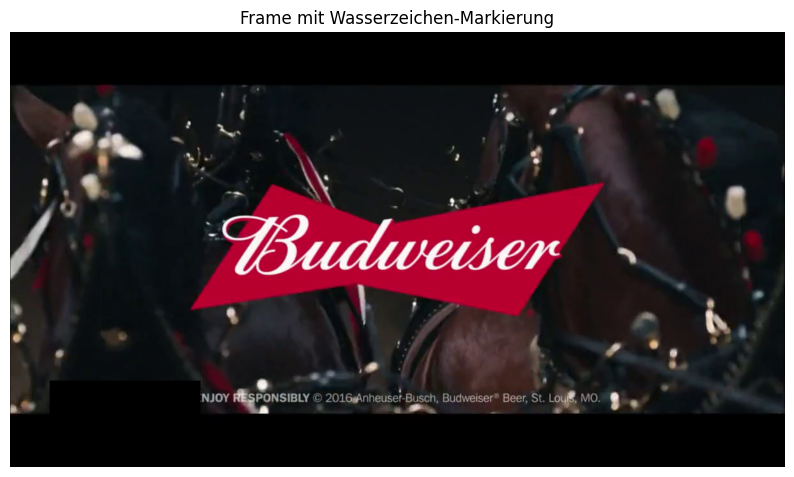

In [139]:
import cv2
import os
import matplotlib.pyplot as plt

# Lade das erste Frame aus dem Ordner
def load_first_frame(folder_path):
    # Überprüfe, ob der Ordner existiert
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        if len(files) > 0:
            first_file = os.path.join(folder_path, files[0])
            return cv2.imread(first_file), first_file
    return None, None


# Lade das erste Frame
frame, frame_path = load_first_frame(target_folder)

if frame is not None:
    print(f"Erstes Frame geladen: {frame_path}")

    # Zeichne ein Rechteck auf die Region, in der das Wasserzeichen vermutet wird
    x, y, w, h = 62, 545, 235, 60  # Beispiel-Koordinaten
    frame_with_roi = frame.copy()
    cv2.rectangle(frame_with_roi, (x, y), (x + w, y + h), (0, 0, 0), -1)  # Schwarzes Rechteck (-1 füllt das Rechteck)
    
    # Konvertiere das Bild von BGR zu RGB (für Matplotlib)
    frame_with_roi_rgb = cv2.cvtColor(frame_with_roi, cv2.COLOR_BGR2RGB)
    
    # Zeige das Bild mit Matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_with_roi_rgb)
    plt.title("Frame mit Wasserzeichen-Markierung")
    plt.axis("off")
    plt.show()
else:
    print("Kein Frame gefunden.")


In [141]:
output_file = "frame_with_roi.png"
cv2.imwrite(output_file, frame_with_roi)
print(f"Das Bild wurde als '{output_file}' gespeichert.")

Das Bild wurde als 'frame_with_roi.png' gespeichert.


Für alle Frames in einem Werbung Black Box Rechteck erzeugen und Analyse durchführen

In [ ]:
import cv2
import os
import pandas as pd

# Funktion: Wasserzeichen-Bereich abdecken
def cover_watermark(frame, x, y, w, h, method="black"):
    """
    Überdeckt den Wasserzeichen-Bereich in einem Bild.
    Args:
    - frame: Das Bild/Frame (numpy-Array)
    - x, y: Obere linke Ecke des Wasserzeichen-Bereichs
    - w, h: Breite und Höhe des Wasserzeichen-Bereichs
    - method: Methode zum Abdecken ("black" oder "blur")
    """
    roi = frame[y:y+h, x:x+w]
    if method == "black":
        # Füllt den Bereich mit Schwarz
        frame[y:y+h, x:x+w] = (0, 0, 0)
    elif method == "blur":
        # Wendet einen Weichzeichner auf den Bereich an
        frame[y:y+h, x:x+w] = cv2.GaussianBlur(roi, (15, 15), 0)
    return frame

# Hauptlogik: Frames aus einem Ordner laden und Wasserzeichen entfernen
results_list = []

# Wasserzeichen-Region 
x, y, w, h = 62, 545, 235, 60  
method = "black" 

# Überprüfen, ob der Ordner existiert
if os.path.exists(target_folder):
    # Liste alle Dateien im Zielordner
    files = [f for f in os.listdir(target_folder) if os.path.isfile(os.path.join(target_folder, f))]
    
    print(f"Gefundene Dateien: {len(files)}")
    for file in files:
        # Vollständiger Pfad zur Datei
        file_path = os.path.join(target_folder, file)
        
        # Lade das Bild mit OpenCV
        image = cv2.imread(file_path)
        
        # Abdeckung des Wasserzeichens
        image = cover_watermark(image, x, y, w, h, method)

        # Perform text recognition with EasyOCR (nur auf das abgedeckte Bild)
        ocr_results = reader.readtext(image)
        
        # Ergebnisse speichern
        for (bbox, text, prob) in ocr_results:
            # Überprüfe, ob der Text gültig ist (nicht leer oder nur Sonderzeichen)
            if text and text.strip() and len(text.strip()) > 1:  # Sicherstellen, dass der Text sinnvoll ist
                results_list.append({
                    "Frame": file,
                    "Recognized_Text": text.strip(),  # Direkter Text ohne zusätzliche Filterung
                })
else:
    print(f"Folder does not exist: {target_folder}")

# Gruppiere die Ergebnisse nach Frames
results_df = pd.DataFrame(results_list)
merged_results = (
    results_df.groupby("Frame") 
    .agg({
        "Recognized_Text": lambda x: ", ".join(x),  # Combine all recognized texts with separator
    })
    .reset_index()
)

# Zeige die bereinigte Tabelle
print(merged_results)


Gefundene Dateien: 86
                   Frame                                    Recognized_Text
0    AD0417_Frame_10.png                                                  €
1   AD0417_Frame_210.png                                         NOT PONIES
2   AD0417_Frame_220.png                                         NOT PONIES
3   AD0417_Frame_230.png                                         NOT PONIES
4   AD0417_Frame_240.png                                         NOT PONIES
5   AD0417_Frame_250.png                                         NOT PONIES
6   AD0417_Frame_260.png                                         NOT PONIES
7   AD0417_Frame_300.png                              BUDWEISE R, NOT SMALL
8   AD0417_Frame_310.png                              BUDWEISE R, NOT SMALL
9   AD0417_Frame_320.png                              BuDWEISE R, NOT SMALL
10  AD0417_Frame_350.png                                         NOTA HOBBY
11  AD0417_Frame_360.png                                         N

### Methode 1 Regex package for removing the watermark "iSpot tv"

Since every frame contains a watermark "iSpot tv" that is recognized as text, the Regex package is used to identify and filter it out from the text.

In [95]:
import re

# Funktion zur Bereinigung und Filterung der Texte
def remove_watermarks_and_filter(text):
    pattern = r"\b(iSp\w*|[\w.\-]*tv)\b"
    cleaned_text = re.sub(pattern, "", text, flags=re.IGNORECASE).strip()
    return cleaned_text

In [96]:
results_list = []

# Überprüfen, ob der Ordner existiert
if os.path.exists(target_folder):
    # Liste alle Dateien im Zielordner
    files = [f for f in os.listdir(target_folder) if os.path.isfile(os.path.join(target_folder, f))]
    
    print(f"Gefundene Dateien: {len(files)}")
    for file in files:
        # Vollständiger Pfad zur Datei
        file_path = os.path.join(target_folder, file)
        
        # Lade das Bild mit OpenCV
        image = cv2.imread(file_path)
        
        # Perform text recognition with EasyOCR
        ocr_results = reader.readtext(image)
        
        # Store results in the list
        for (bbox, text, prob) in ocr_results:
            cleaned_text = remove_watermarks_and_filter(text)
            if cleaned_text:  # Nur hinzufügen, wenn der bereinigte Text nicht leer ist
                results_list.append({
                    "Frame": file,
                    "Recognized_Text": cleaned_text,
                })
else:
    print(f"Folder does not exist: {target_folder}")

# die Texte nach der Spalte "Frame" gruppieren
results_df = pd.DataFrame(results_list)
merged_results = (
    results_df.groupby("Frame") 
    .agg({
        "Recognized_Text": lambda x: ", ".join(x),  # Combine all recognized texts with separator
    })
    .reset_index()
)

print(merged_results)

Gefundene Dateien: 86
                   Frame                                    Recognized_Text
0    AD0417_Frame_10.png                                                  €
1   AD0417_Frame_210.png                                         NOT PONIES
2   AD0417_Frame_220.png                                         NOT PONIES
3   AD0417_Frame_230.png                                         NOT PONIES
4   AD0417_Frame_240.png                                         NOT PONIES
5   AD0417_Frame_250.png                                         NOT PONIES
6   AD0417_Frame_260.png                                         NOT PONIES
7   AD0417_Frame_280.png                                                 .k
8   AD0417_Frame_300.png                              BUDWEISE R, NOT SMALL
9   AD0417_Frame_310.png                              BUDWEISE R, NOT SMALL
10  AD0417_Frame_320.png                              BuDWEISE R, NOT SMALL
11  AD0417_Frame_350.png                                         N

In [143]:
# Speichere die Tabelle als CSV

merged_results.to_csv("merged_results_box.csv", index=False)
print("Die Tabelle wurde als 'merged_results.csv' gespeichert.")

Die Tabelle wurde als 'merged_results.csv' gespeichert.


### Duplikate entfernen

In [ ]:
from collections import Counter
from rapidfuzz import fuzz

# Funktion: Gruppiere Texte nach Ähnlichkeit und wähle den häufigsten
def remove_similar_texts(texts, threshold=90):
    text_groups = []
    for text in texts:
        group_found = False
        for group in text_groups:
            if fuzz.ratio(text, group[0]) >= threshold:  # Überprüfe Ähnlichkeit
                group.append(text)
                group_found = True
                break
        if not group_found:
            text_groups.append([text])
    # Wähle pro Gruppe den häufigsten Text
    return [Counter(group).most_common(1)[0][0] for group in text_groups]


# Funktion: Erstelle die bereinigte Tabelle
def create_cleaned_dataframe(merged_results, ad_column="Frame", text_column="Recognized_Text", threshold=80):
    # Extrahiere den "Ad"-Namen aus den Frame-Namen
    merged_results["ad"] = merged_results[ad_column].apply(lambda x: x.split("_")[0])  
    # Gruppiere nach "ad" und bereinige Texte
    cleaned_data = []
    for ad, group in merged_results.groupby("ad"):
        unique_texts = remove_similar_texts(group[text_column].tolist(), threshold=threshold)
        unique_texts = [text for text in unique_texts if text.strip()]
        combined_text = "; ".join(unique_texts)  # Kombiniere die bereinigten Texte
        cleaned_data.append({"ad": ad, "recognized_text": combined_text})
    
    # Erstelle eine neue DataFrame
    cleaned_df = pd.DataFrame(cleaned_data)
    return cleaned_df


In [145]:

# Bereinige die Texte und erstelle die neue Tabelle
cleaned_df = create_cleaned_dataframe(merged_results, ad_column="Frame", text_column="Recognized_Text", threshold=60)

# Zeige das Ergebnis
print(cleaned_df)


       ad                                    recognized_text
0  AD0417  € NOT PONIES BUDWEISE R, NOT SMALL NOTA HOBBY ...


In [146]:
cleaned_df.to_csv("cleaned_df_box.csv", index=False)

# Main Script

In [ ]:
def load_all_frames(input_folder):
    """
    Listet alle Frames aus allen Unterordnern auf.
    Args:
        input_folder (str): Der Pfad zum Hauptordner mit den Frames.
    Returns:
        List[Dict]: Eine Liste von Dictionaries mit Frame-Pfad und zugehörigem Werbungsnamen.
    """
    frames = []
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith((".png", ".jpg")):  # Akzeptiere nur Bilddateien
                ad_name = os.path.basename(root)  # Name des Werbungs-Ordners
                frame_path = os.path.join(root, file)
                frames.append({"ad": ad_name, "frame_path": frame_path})
    return frames

In [ ]:
# alle frames laden
os.getenv("INPUT_FRAMES_ALL")

# list dir
os.listdir(os.getenv("INPUT_FRAMES_ALL"))

# list nested files of all levels
for root, dirs, files in os.walk(os.getenv("INPUT_FRAMES_ALL")):
    for file in files:
        print(os.path.join(root, file))


# .. TODO: Implement OCR
# create new dataframe with columns ad and recognized_text
df = pd.DataFrame(columns=["ad", "recognized_text"])


/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2014/ADs_IG_2014/AD0308/AD0308_Frame_590.png
/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2014/ADs_IG_2014/AD0308/AD0308_Frame_210.png
/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2014/ADs_IG_2014/AD0308/AD0308_Frame_350.png
/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2014/ADs_IG_2014/AD0308/AD0308_Frame_1270.png
/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2014/ADs_IG_2014/AD0308/AD0308_Frame_220.png
/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2014/ADs_IG_2014/AD0308/AD0308_Frame_750.png
/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2014/ADs_IG_2014/AD0308/AD0308_Frame_150.png
/home/giulia/Commercial-Brand-Differentiating-Message-Analysis/01_input_frames_all/2014/ADs_IG_2014/AD0

Probleme mit Wörterbücher: Markennane sind nicht in Wörterbücher, whitelist erstellen

In [49]:
import re
import enchant

# Wörterbuch für Englisch
english_dict = enchant.Dict("en_US")

def clean_recognized_text_with_enchant(text):
    """
    Bereinigt erkannte Texte, indem bedeutungslose Symbole, Zeichen und zufällige Wörter entfernt werden.
    Prüft zusätzlich, ob Wörter im Wörterbuch vorhanden sind.
    
    Args:
        text (str): Der erkannte Text.
    Returns:
        str: Der bereinigte Text.
    """
    # Whitelist von häufigen kurzen Wörtern
    whitelist = {"in", "on", "by", "at", "to", "is", "as", "it", "of", "be", "or", "we", "an", "up", "no", "do", "am", "go", "my", "me", "us", "so"}

    # Entferne nicht-alphanumerische Zeichen, außer Leerzeichen und Kommas
    text = re.sub(r"[^\w\s]", "", text)
    print("without_sonderzeichen:", text)

    # Teile den Text in Wörter
    words_in_text = text.split()
    print("split:",words_in_text)
    # Filtere Wörter, die entweder:
    # 1. Im Wörterbuch vorkommen oder
    # 2. In der Whitelist enthalten sind
    meaningful_words = [
        word for word in words_in_text
        if english_dict.check(word) or word.lower() in whitelist
    ]

    # Kombiniere die bereinigten Wörter zurück in einen Text
    cleaned_text = " ".join(meaningful_words)

    return cleaned_text


In [34]:
import re
import enchant
from collections import Counter

# Wörterbuch für Englisch
english_dict = enchant.Dict("en_US")

def clean_recognized_text_with_dynamic_whitelist(texts, initial_whitelist, min_frequency=2):
    """
    Bereinigt erkannte Texte und erweitert die Whitelist dynamisch basierend auf der Häufigkeit und Länge von Wörtern.
    Prüft zusätzlich, ob Wörter im Wörterbuch vorhanden sind.
    
    Args:
        texts (list of str): Liste der erkannten Texte.
        initial_whitelist (set): Anfangs-Whitelist von gültigen Wörtern.
        min_frequency (int): Mindesthäufigkeit, um Wörter der Whitelist hinzuzufügen.
        
    Returns:
        list of str: Liste bereinigter Texte.
        set: Erweiterte Whitelist.
    """
    print(texts)
    # 1. Sonderzeichen aus jedem Text entfernen
    cleaned_texts = [re.sub(r"[^\w\s]", "", text)]
    print("Bereinigte Texte ohne Sonderzeichen:", cleaned_texts)

    # 2. Wörterhäufigkeit zählen
    all_words = " ".join(cleaned_texts).split()
    word_counts = Counter(all_words)
    print("Wörterhäufigkeit:", word_counts)

    # 3. Erweiterte Whitelist erstellen
    whitelist = initial_whitelist.copy()
    for word, count in word_counts.items():
        # Füge Wörter hinzu, die häufig genug sind und länger als 3 Zeichen
        if count >= min_frequency and len(word) > 3:
            whitelist.add(word.lower())
    print("Erweiterte Whitelist:", whitelist)

    # 4. Texte basierend auf Whitelist und Wörterbuch bereinigen
    def clean_text(text):
        # Teile den Text in Wörter
        words_in_text = text.split()
        print("Aufgeteilte Wörter:", words_in_text)

        # Behalte Wörter, die entweder:
        # 1. Im Wörterbuch vorkommen
        # 2. In der erweiterten Whitelist stehen
        meaningful_words = [
            word for word in words_in_text
            if english_dict.check(word) or word.lower() in whitelist
        ]

        # Kombiniere die bereinigten Wörter zurück in einen Text
        return " ".join(meaningful_words)

    # 5. Bereinige jeden Text
    final_cleaned_texts = [clean_text(text) for text in cleaned_texts]

    return final_cleaned_texts, whitelist


In [41]:
import re
import enchant
from collections import Counter

# Wörterbuch für Englisch
english_dict = enchant.Dict("en_US")

def clean_recognized_text_with_dynamic_whitelist(text, initial_whitelist, min_frequency=2):
    """
    Bereinigt erkannte Texte und erweitert die Whitelist dynamisch basierend auf der Häufigkeit und Länge von Wörtern.
    Prüft zusätzlich, ob Wörter im Wörterbuch vorhanden sind.
    
    Args:
        text (str): Eingabetext (eine lange Zeichenkette).
        initial_whitelist (set): Anfangs-Whitelist von gültigen Wörtern.
        min_frequency (int): Mindesthäufigkeit, um Wörter der Whitelist hinzuzufügen.
        
    Returns:
        str: Bereinigter Text.
        set: Erweiterte Whitelist.
    """
    # 1. Sonderzeichen entfernen, nur alphanumerische Zeichen und Leerzeichen behalten
    cleaned_text = re.sub(r"[^\w\s]", "", text)
    print("Bereinigter Text ohne Sonderzeichen:", cleaned_text)

    # 2. Text in Wörter aufteilen
    words_in_text = cleaned_text.split()
    lower_words_in_text = [word.lower() for word in words_in_text]  # Einheitliche Kleinschreibung
    print("Aufgeteilte Wörter:", words_in_text)

    # 3. Wörterhäufigkeit zählen
    word_counts = Counter(words_in_text)
    print("Wörterhäufigkeit:", word_counts)

    # 4. Whitelist erweitern
    whitelist = initial_whitelist.copy()
    for word, count in word_counts.items():
        if count >= min_frequency and len(word) > 3:  # Nur Wörter mit ausreichender Häufigkeit und Länge
            whitelist.add(word)
    print("Erweiterte Whitelist:", whitelist)

    # 5. Filtere Wörter basierend auf Wörterbuch und Whitelist
    meaningful_words = [
        word for word in words_in_text
        if english_dict.check(word) or word.lower() in whitelist
    ]

    # 6. Bereinige den Text, indem nur relevante Wörter beibehalten werden
    final_cleaned_text = " ".join(meaningful_words)
    return final_cleaned_text, whitelist


In [43]:
import re
import enchant
from collections import Counter

# Wörterbuch für Englisch
english_dict = enchant.Dict("en_US")

def clean_recognized_text_with_dynamic_whitelist(text, initial_whitelist, min_frequency=2):
    """
    Bereinigt erkannte Texte und erweitert die Whitelist dynamisch basierend auf der Häufigkeit und Länge von Wörtern.
    Behandelt Groß- und Kleinschreibung einheitlich.
    
    Args:
        text (str): Eingabetext (eine lange Zeichenkette).
        initial_whitelist (set): Anfangs-Whitelist von gültigen Wörtern.
        min_frequency (int): Mindesthäufigkeit, um Wörter der Whitelist hinzuzufügen.
        
    Returns:
        str: Bereinigter Text.
        set: Erweiterte Whitelist.
    """
    # 1. Sonderzeichen entfernen, nur alphanumerische Zeichen und Leerzeichen behalten
    cleaned_text = re.sub(r"[^\w\s]", "", text)
    print("Bereinigter Text ohne Sonderzeichen:", cleaned_text)

    # 2. Text in Wörter aufteilen und in Kleinbuchstaben umwandeln
    words_in_text = cleaned_text.split()
    lower_words_in_text = [word.lower() for word in words_in_text]  # Einheitliche Kleinschreibung
    print("Aufgeteilte Wörter (Kleinschreibung):", lower_words_in_text)

    # 3. Wörterhäufigkeit zählen
    word_counts = Counter(lower_words_in_text)
    print("Wörterhäufigkeit:", word_counts)

    # 4. Whitelist erweitern
    whitelist = initial_whitelist.copy()
    for word, count in word_counts.items():
        if count >= min_frequency and len(word) > 3:  # Nur Wörter mit ausreichender Häufigkeit und Länge
            whitelist.add(word)
    print("Erweiterte Whitelist:", whitelist)

    # 5. Filtere Wörter basierend auf Wörterbuch und Whitelist
    meaningful_words = [
        word for word in words_in_text
        if english_dict.check(word) or word.lower() in whitelist
    ]

    # 6. Bereinige den Text, indem nur relevante Wörter beibehalten werden
    final_cleaned_text = " ".join(meaningful_words)
    return final_cleaned_text, whitelist


In [52]:
clean_recognized_text_with_enchant("Bravery:; Bravery: It'5 what defines us.; Audi, CW), Truth in Engineering, #BraveryWins; SCORING SUMMARY, BALTIMORE, PLAYS 6, Art, YARDS 51, RAVENS, TIME 2:29, Jin: 13-YARD TD RECEPTION; Away, Fiel, 22, SCORING SUMMARY, BALTIMORE, ANQUAN BOLDIN, AtH REC TD, THIS POSTSEASON, MFD, Art,, (4 REC TD IN, REG SEASON), RAVENS; '903, Closed Course, obey speed ard traffic laws;, Aluys; PRINCIPAL, ONLY; PRINCE; PathctpaE, BHrSoN, ISQHIOOL, Hu; bxdron, ISOHOOL, Hul"
)

without_sonderzeichen: Bravery Bravery It5 what defines us Audi CW Truth in Engineering BraveryWins SCORING SUMMARY BALTIMORE PLAYS 6 Art YARDS 51 RAVENS TIME 229 Jin 13YARD TD RECEPTION Away Fiel 22 SCORING SUMMARY BALTIMORE ANQUAN BOLDIN AtH REC TD THIS POSTSEASON MFD Art 4 REC TD IN REG SEASON RAVENS 903 Closed Course obey speed ard traffic laws Aluys PRINCIPAL ONLY PRINCE PathctpaE BHrSoN ISQHIOOL Hu bxdron ISOHOOL Hul
split: ['Bravery', 'Bravery', 'It5', 'what', 'defines', 'us', 'Audi', 'CW', 'Truth', 'in', 'Engineering', 'BraveryWins', 'SCORING', 'SUMMARY', 'BALTIMORE', 'PLAYS', '6', 'Art', 'YARDS', '51', 'RAVENS', 'TIME', '229', 'Jin', '13YARD', 'TD', 'RECEPTION', 'Away', 'Fiel', '22', 'SCORING', 'SUMMARY', 'BALTIMORE', 'ANQUAN', 'BOLDIN', 'AtH', 'REC', 'TD', 'THIS', 'POSTSEASON', 'MFD', 'Art', '4', 'REC', 'TD', 'IN', 'REG', 'SEASON', 'RAVENS', '903', 'Closed', 'Course', 'obey', 'speed', 'ard', 'traffic', 'laws', 'Aluys', 'PRINCIPAL', 'ONLY', 'PRINCE', 'PathctpaE', 'BHrSoN', 'IS

'Bravery Bravery what defines us Audi CW Truth in Engineering SCORING SUMMARY BALTIMORE PLAYS 6 Art YARDS RAVENS TIME TD RECEPTION Away SCORING SUMMARY BALTIMORE REC TD THIS POSTSEASON Art 4 REC TD IN REG SEASON RAVENS Closed Course obey speed traffic laws PRINCIPAL ONLY PRINCE'

In [12]:
# Liste erkannter Texte
texts = [
    "Honda Rigeline RTL 3[, Sf], S} |2|, amazing",
    "Rigeline RTL is a new car model",
    "Honda Rigeline RTL",
    "Honda is amazing",
]

# Anfangs-Whitelist
initial_whitelist = {"rigeline", "rtl"}


In [47]:
initial_whitelist = {"in", "on", "by", "at", "to", "is", "as", "it", "of", "be", "or", "we", "an", "up", "no", "do", "am", "go", "my", "me", "us", "so"}
texts=("Aed, WGn, Bum, JURt, BURt, VUt, LBURt, BUR, BuRt, VUp, ouD, Bot, BUR, Burt, Ba, BURt; ENJOY RESPONSIBLY @ 2018 A-B, BUD LGHT@ BEER ST, LOUIS MO; enjoy AESPONSIELY @ 2t8Aa Umst, '~no; Co k; Zo Be Continueo; BUD, LIGHT")


In [48]:
cleaned_texts, updated_whitelist = clean_recognized_text_with_dynamic_whitelist(texts, initial_whitelist)
cleaned_texts

Bereinigter Text ohne Sonderzeichen: Aed WGn Bum JURt BURt VUt LBURt BUR BuRt VUp ouD Bot BUR Burt Ba BURt ENJOY RESPONSIBLY  2018 AB BUD LGHT BEER ST LOUIS MO enjoy AESPONSIELY  2t8Aa Umst no Co k Zo Be Continueo BUD LIGHT
Aufgeteilte Wörter (Kleinschreibung): ['aed', 'wgn', 'bum', 'jurt', 'burt', 'vut', 'lburt', 'bur', 'burt', 'vup', 'oud', 'bot', 'bur', 'burt', 'ba', 'burt', 'enjoy', 'responsibly', '2018', 'ab', 'bud', 'lght', 'beer', 'st', 'louis', 'mo', 'enjoy', 'aesponsiely', '2t8aa', 'umst', 'no', 'co', 'k', 'zo', 'be', 'continueo', 'bud', 'light']
Wörterhäufigkeit: Counter({'burt': 4, 'bur': 2, 'enjoy': 2, 'bud': 2, 'aed': 1, 'wgn': 1, 'bum': 1, 'jurt': 1, 'vut': 1, 'lburt': 1, 'vup': 1, 'oud': 1, 'bot': 1, 'ba': 1, 'responsibly': 1, '2018': 1, 'ab': 1, 'lght': 1, 'beer': 1, 'st': 1, 'louis': 1, 'mo': 1, 'aesponsiely': 1, '2t8aa': 1, 'umst': 1, 'no': 1, 'co': 1, 'k': 1, 'zo': 1, 'be': 1, 'continueo': 1, 'light': 1})
Erweiterte Whitelist: {'it', 'go', 'an', 'be', 'on', 'to', 'no

'Bum BURt BUR BuRt Bot BUR Burt Ba BURt ENJOY RESPONSIBLY AB BUD BEER ST LOUIS MO enjoy no Co k Be BUD LIGHT'

In [20]:
clean_recognized_text_with_enchant("Nike Oreo Adidas Ebay Audi"
)

without_sonderzeichen: Nike Oreo Adidas Ebay Audi
split: ['Nike', 'Oreo', 'Adidas', 'Ebay', 'Audi']


'Nike Oreo Adidas Audi'